In [1]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
kospi = fdr.DataReader('KS11')
kospi["Change"]=kospi["Change"]*100
kospi=kospi.drop(["Open","Close","High","Low","Volume","UpDown","Comp","Amount","MarCap"], axis=1)
kospi.rename(columns={"Change":"KOSPI"}, inplace=True)
kospi.head()

,KOSPI
Date,
2001-06-11,-2.18
2001-06-12,-0.18
2001-06-13,1.14
2001-06-14,-0.05
2001-06-15,0.85


In [3]:
nasdaq = fdr.DataReader("IXIC", "2001-06-08")
nasdaq["Change"] = round(nasdaq["Adj Close"].pct_change() * 100, 2)
nasdaq = nasdaq.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
nasdaq = nasdaq.drop("2001-06-08", axis=0)
nasdaq.rename(columns={"Change": "NASDAQ"}, inplace=True)
nasdaq

,NASDAQ
Date,
2001-06-11,-2.00
2001-06-12,-0.04
2001-06-13,-2.23
2001-06-14,-3.66
2001-06-15,-0.77
...,...
2024-04-26,2.03
2024-04-29,0.35
2024-04-30,-2.04


In [4]:
sap = fdr.DataReader("S&P500", "2001-06-08")
sap["Change"] = round(sap["Adj Close"].pct_change() * 100, 2)
sap = sap.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
sap = sap.drop("2001-06-08", axis=0)
sap.rename(columns={"Change": "S&P"}, inplace=True)
sap

,S&P
Date,
2001-06-11,-0.84
2001-06-12,0.12
2001-06-13,-1.13
2001-06-14,-1.75
2001-06-15,-0.45
...,...
2024-04-26,1.02
2024-04-29,0.32
2024-04-30,-1.57


In [5]:
usa_treasury = fdr.DataReader("US10YT", "2001-06-08")
usa_treasury["Change"] = round(usa_treasury["Adj Close"].pct_change() * 100, 2)
usa_treasury = usa_treasury.drop(
    ["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1
)
usa_treasury = usa_treasury.drop("2001-06-08", axis=0)
usa_treasury = usa_treasury.rename(columns={"Change": "USA_TREASURY"})
usa_treasury

C:\Users\user\AppData\Local\Temp\ipykernel_5448\2967678365.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usa_treasury["Change"] = round(usa_treasury["Adj Close"].pct_change() * 100, 2)


,USA_TREASURY
Date,
2001-06-11,-0.86
2001-06-12,-0.89
2001-06-13,0.32
2001-06-14,-0.80
2001-06-15,0.25
...,...
2024-04-26,-0.79
2024-04-29,-1.18
2024-04-30,1.56


In [6]:
japan = fdr.DataReader("N225", "2001-06-08")
japan["Change"] = round(japan["Adj Close"].pct_change() * 100, 2)
japan = japan.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
japan = japan.drop("2001-06-08", axis=0)
japan.rename(columns={"Change": "Nikkei"}, inplace=True)
japan

C:\Users\user\AppData\Local\Temp\ipykernel_5448\1919354611.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  japan["Change"] = round(japan["Adj Close"].pct_change() * 100, 2)


,Nikkei
Date,
2001-06-11,-1.52
2001-06-12,-2.92
2001-06-13,-0.13
2001-06-14,0.18
2001-06-15,-0.44
...,...
2024-04-25,-2.16
2024-04-26,0.81
2024-04-30,1.24


In [7]:
usd_krw = fdr.DataReader("USD/KRW", "2001-06-08","2024-05-03")
usd_krw["Change"] = round(usd_krw["Adj Close"].pct_change() * 100, 2)
usd_krw = usd_krw.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
usd_krw = usd_krw.rename(columns={"Change": "USD/KRW"})
usd_krw

C:\Users\user\AppData\Local\Temp\ipykernel_5448\3685754074.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usd_krw["Change"] = round(usd_krw["Adj Close"].pct_change() * 100, 2)


,USD/KRW
Date,
2003-12-01,NaN
2003-12-02,-0.28
2003-12-03,-0.21
2003-12-04,-0.20
2003-12-05,-0.45
...,...
2024-04-26,-0.38
2024-04-29,0.39
2024-04-30,-0.18


In [8]:
result_data = pd.concat([kospi, nasdaq, sap, usd_krw, usa_treasury, japan], axis=1)#concat은 행방향으로 병합되므로 축을 따로 지정해줘야 한다.
result_data.fillna(result_data.mean(), inplace=True)#공휴일이 맞지 않은 경우 평균값을 넣어준다.
result_data = round(result_data, 2)
result_data.head()

,KOSPI,NASDAQ,S&P,USD/KRW,USA_TREASURY,Nikkei
Date,,,,,,
2001-06-11,-2.18,-2.00,-0.84,0.01,-0.86,-1.52
2001-06-12,-0.18,-0.04,0.12,0.01,-0.89,-2.92
2001-06-13,1.14,-2.23,-1.13,0.01,0.32,-0.13
2001-06-14,-0.05,-3.66,-1.75,0.01,-0.80,0.18
2001-06-15,0.85,-0.77,-0.45,0.01,0.25,-0.44


In [9]:
result_data.to_csv("./data/kospi_result_data.csv")

# 비지도 학습을 위한 데이터 분리

In [10]:
X=result_data[["NASDAQ","S&P", "USD/KRW","USA_TREASURY","Nikkei"]]
y=result_data["KOSPI"]

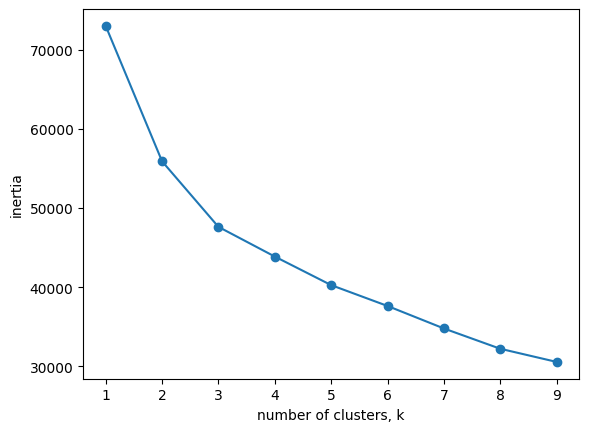

In [16]:
#k-mean으로 평균 구하기
from sklearn.cluster import KMeans

ks = range(1, 10)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, "-o")
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

In [17]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans[1:10]

array([2, 2, 1, 2, 2, 2, 2, 2, 1])

# T-SNE를 통한 데이터 확인

비지도 학습을 통해 결과를 분석할 때 y값을 내가 정한다.
(예시: kospi를 y값으로 정했을 경우 해당 데이터로 자산포트폴리오를 구성할 때 kospi보다 수익률이 높다)

In [13]:
from sklearn.manifold import TSNE
import seaborn as sns
t_sne=X.shape[0]
tsne=TSNE(n_components=2, verbose=1, perplexity=2, n_iter=1000, random_state=42)
tsne_results=tsne.fit_transform(X)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 5975 samples in 0.005s...
[t-SNE] Computed neighbors for 5975 samples in 0.057s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5975
[t-SNE] Computed conditional probabilities for sample 2000 / 5975
[t-SNE] Computed conditional probabilities for sample 3000 / 5975
[t-SNE] Computed conditional probabilities for sample 4000 / 5975
[t-SNE] Computed conditional probabilities for sample 5000 / 5975
[t-SNE] Computed conditional probabilities for sample 5975 / 5975
[t-SNE] Mean sigma: 0.048741
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.138039
[t-SNE] KL divergence after 1000 iterations: 1.440655


In [14]:
tsne_results

array([[-29.1163    ,  68.3303    ],
       [-34.522625  ,  36.893414  ],
       [ -2.1168525 ,  84.77469   ],
       ...,
       [-65.343605  ,   0.35459134],
       [ 30.719013  , -81.16972   ],
       [-18.846106  ,   2.6972628 ]], dtype=float32)

C:\Users\user\AppData\Local\Temp\ipykernel_5448\4087105649.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=20, cmap="viridis")


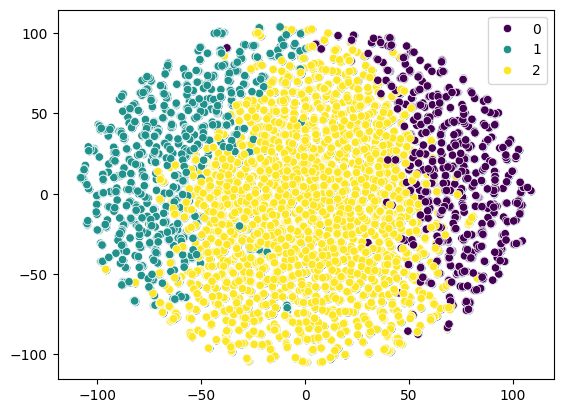

In [21]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=20, cmap="viridis")
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=y_kmeans, palette="viridis")
plt.show()

In [22]:
df1 = result_data.copy()

In [23]:
df1["cluster"] = y_kmeans
df1

,KOSPI,NASDAQ,S&P,USD/KRW,USA_TREASURY,Nikkei,cluster
Date,,,,,,,
2001-06-11,-2.18,-2.00,-0.84,0.01,-0.86,-1.52,1
2001-06-12,-0.18,-0.04,0.12,0.01,-0.89,-2.92,2
2001-06-13,1.14,-2.23,-1.13,0.01,0.32,-0.13,2
2001-06-14,-0.05,-3.66,-1.75,0.01,-0.80,0.18,1
2001-06-15,0.85,-0.77,-0.45,0.01,0.25,-0.44,2
...,...,...,...,...,...,...,...
2024-04-29,1.17,0.35,0.32,0.39,-1.18,0.03,2
2024-04-30,0.17,-2.04,-1.57,-0.18,1.56,1.24,2
2024-05-01,0.03,-0.33,-0.34,0.79,-1.94,-0.34,1


In [24]:
cluster_total = df1.groupby("cluster").mean()
cluster_total["return"] = cluster_total.T.mean()
cluster_total["std"] = cluster_total.T.std()
cluster_total = cluster_total.T
cluster_total

cluster,0,1,2
KOSPI,0.308979,-0.394073,0.100843
NASDAQ,0.707193,-1.317081,0.312169
S&P,0.633229,-1.133285,0.251323
USD/KRW,-0.021207,0.094366,-0.014396
USA_TREASURY,3.423641,-2.513341,-0.061710
Nikkei,0.373994,-0.471065,0.099034
return,0.904305,-0.955747,0.114544
std,1.151203,0.840765,0.132843


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  func(*args, **kwarg

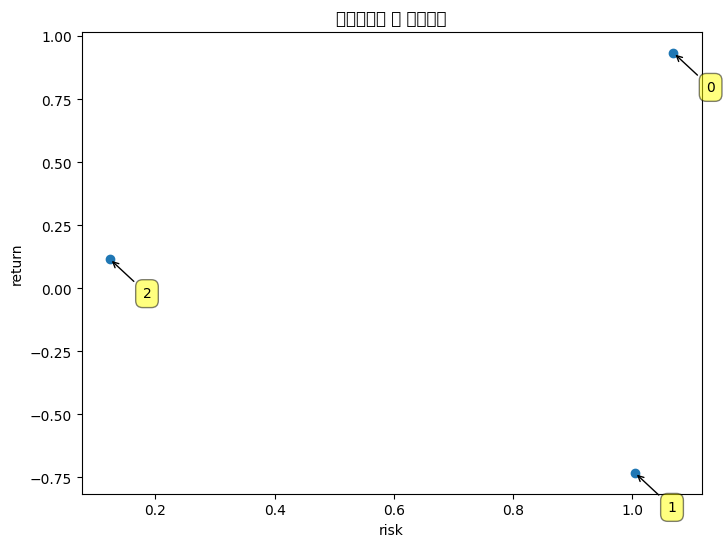

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(cluster_total.std(), cluster_total.mean())
plt.xlabel("risk")
plt.ylabel("return")
plt.title("평균수익률 및 표준편차")
for label, x, y in zip(
    cluster_total.columns, cluster_total.std(), cluster_total.mean()
):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(30, -30),
        textcoords="offset points",
        ha="right",
        va="bottom",
        bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
    )